In [1]:
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\nikhi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


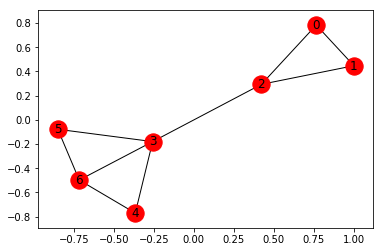

In [2]:
G = nx.complete_graph(3)
G.add_edges_from([(2, 3), (3, 4), (3, 6), (3,5), (4, 6), (5,6)])
nx.draw_networkx(G)

In [7]:
maximal_cliques_of_G = list(nx.find_cliques(G))
maximal_cliques_of_G

[[0, 1, 2], [3, 2], [3, 6, 4], [3, 6, 5]]

In [53]:
def make_first_structure_vector(list_of_maximal_cliques):
    
    list_of_q_connected_components_at_qth_levels = [] #qth entry is the list of q-connected components
    
    q_max = np.max([len(x) for x in list_of_maximal_cliques])-1 
    
    for q in range(q_max+1):
        
        temp_list_of_max_cliques = list_of_maximal_cliques.copy()
        q_connected_at_this_level = []
        
        temp_list_of_max_cliques = [x for x in temp_list_of_max_cliques if len(x)>q]

        while temp_list_of_max_cliques != []:
            temp_list = []

            temp_list.append(temp_list_of_max_cliques[0])
            temp_list_of_max_cliques.remove(temp_list_of_max_cliques[0])
                        
            counter_for_check = -1
            while len(temp_list)>counter_for_check:
                counter_for_check = len(temp_list)
                for clique in temp_list_of_max_cliques:
                    if len(clique) == q:
                        temp_list_of_max_cliques.remove(clique)

                    if any([len(list(set(clique_for_eval)&set(clique))) == q+1 for clique_for_eval in temp_list]):
                        temp_list.append(clique)
                        temp_list_of_max_cliques.remove(clique)
            q_connected_at_this_level.append(temp_list)
            
        list_of_q_connected_components_at_qth_levels.append(q_connected_at_this_level)
    
    Q_vector = [len(x) for x in list_of_q_connected_components_at_qth_levels]
    
    return Q_vector, list_of_q_connected_components_at_qth_levels

In [54]:
Q_vector, q_connected_components = make_first_structure_vector(maximal_cliques_of_G)

print("The Q_vector is",Q_vector)
for index in range(len(q_connected_components)):
    print("The {}^th connected components at the {}^th level is {}".format(index, index, q_connected_components[index]), end="\n" )

The Q_vector is [1, 3, 3]
The 0^th connected components at the 0^th level is [[[0, 1, 2], [3, 2], [3, 6, 5], [3, 6, 4]]]
The 1^th connected components at the 1^th level is [[[0, 1, 2]], [[3, 2]], [[3, 6, 4], [3, 6, 5]]]
The 2^th connected components at the 2^th level is [[[0, 1, 2]], [[3, 6, 4]], [[3, 6, 5]]]


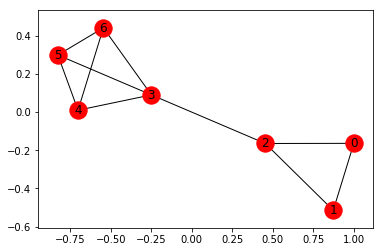

In [55]:
G1 = G.copy()
G1.add_edge(4, 5)
maximal_cliques_of_G1 = list(nx.find_cliques(G1))
nx.draw_networkx(G1)

In [56]:
Q_vector, q_connected_components = make_first_structure_vector(maximal_cliques_of_G1)

print("The Q_vector is",Q_vector)
for index in range(len(q_connected_components)):
    print("The {}^th connected components at the {}^th level is {}".format(index, index, q_connected_components[index]), end="\n" )

The Q_vector is [1, 3, 2, 1]
The 0^th connected components at the 0^th level is [[[0, 1, 2], [3, 2], [3, 4, 5, 6]]]
The 1^th connected components at the 1^th level is [[[0, 1, 2]], [[3, 2]], [[3, 4, 5, 6]]]
The 2^th connected components at the 2^th level is [[[0, 1, 2]], [[3, 4, 5, 6]]]
The 3^th connected components at the 3^th level is [[[3, 4, 5, 6]]]
